# Quick Start

## Installation

The recommended way to install PyMinimax is using pip.

```
pip install pyminimax
```

PyMinimax runs on any platform with Python 3 and NumPy installed. Installing SciPy is not required but strongly recommended as SciPy has the facility to interpret the results by PyMinimax. 

## Usage

The usage of the `pyminimax.minimax` function is the same as the hierarchical clustering methods in SciPy, for example `scipy.cluster.hierarchy.complete`. Here we also demonstrate with the same example as in SciPy's documentation. First consider a dataset of $n=12$ points: 

    x x    x x
    x        x

    x        x
    x x    x x
    
The `pyminimax.minimax` function takes a flattened distance matrix of the data as an input argument, which can be computed by `scipy.spatial.distance.pdist`. By default, the return value of `pyminimax.minimax` has the same format as that of `scipy.cluster.hierarchy.linkage`. This is an $(n-1)$ by 4 matrix keeping the clustering result. A detailed explanation of its format can be found in the documentation of `scipy.cluster.hierarchy.linkage`.

In [1]:
from pyminimax import minimax
from scipy.spatial.distance import pdist

X = [[0, 0], [0, 1], [1, 0], [0, 4], [0, 3], [1, 4], [4, 0], [3, 0], [4, 1], [4, 4], [3, 4], [4, 3]]
Z = minimax(pdist(X))

Z

array([[ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 2.        , 12.        ,  1.        ,  3.        ],
       [ 3.        ,  4.        ,  1.        ,  2.        ],
       [ 6.        ,  7.        ,  1.        ,  2.        ],
       [ 5.        , 14.        ,  1.        ,  3.        ],
       [ 8.        , 15.        ,  1.        ,  3.        ],
       [ 9.        , 10.        ,  1.        ,  2.        ],
       [11.        , 18.        ,  1.        ,  3.        ],
       [13.        , 16.        ,  3.16227766,  6.        ],
       [17.        , 19.        ,  3.16227766,  6.        ],
       [20.        , 21.        ,  5.        , 12.        ]])

Given the `Z` matrix, one can then utilize the methods in `scipy.cluster.hierarchy` to present the clustering result in a more readable manner. Below are examples applying `dendrogram` and `fcluster`. 

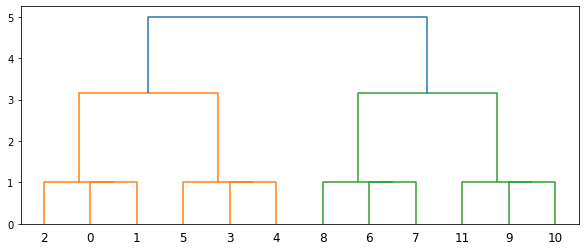

In [2]:
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 4))
dendrogram(Z)
plt.show()

In [3]:
from scipy.cluster.hierarchy import fcluster

fcluster(Z, t=1.8, criterion='distance')

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], dtype=int32)

The above result of `fcluster` says that, cutting the dendrogram at 1.8 threshold, the data has 4 clusters, with the first 3 points being in the first cluster, the following 3 in the second, and so on. 

## See Also

* [scipy.cluster.hierarchy.complete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.complete.html)
* [scipy.cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)
* [scipy.cluster.hierarchy.fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)
* [scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
* [scipy.spatial.distance.pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)